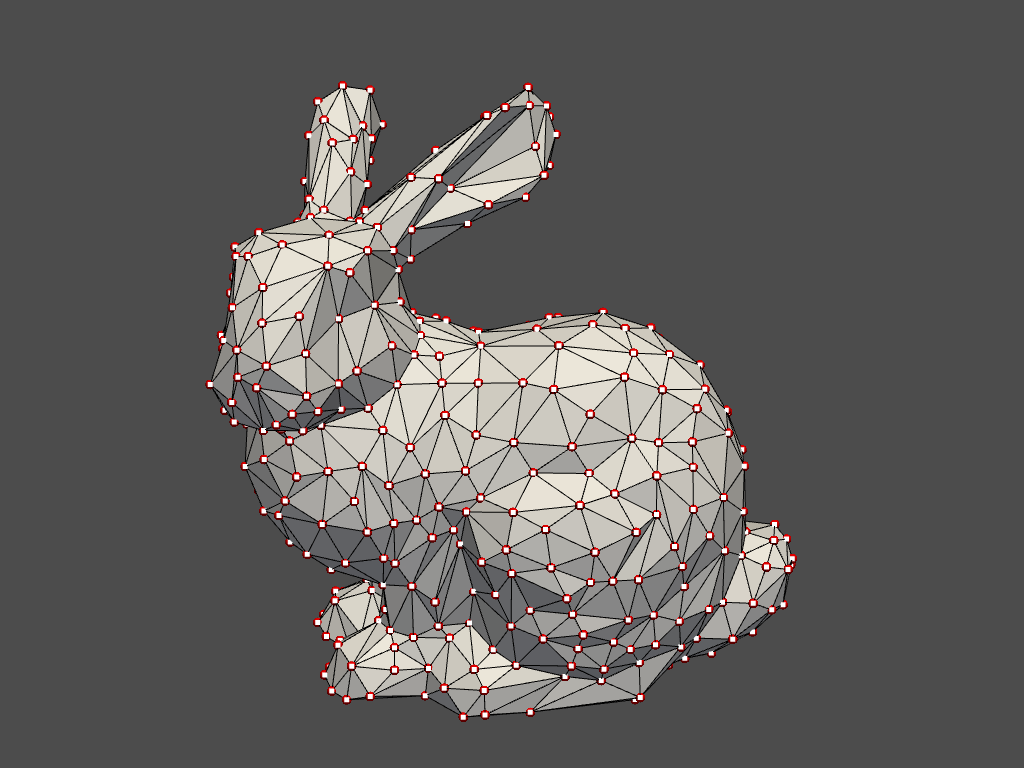

[(0.02, 0.3, 0.73),
 (0.02, 0.03, -0.022),
 (-0.02999850011249063, 0.9399530035247063, -0.33998300127489384)]

In [1]:
import pyvista as pv
from pyvista import examples

mesh = examples.download_bunny_coarse()

p = pv.Plotter()
p.add_mesh(mesh, show_edges=True, color='white')
p.add_mesh(pv.PolyData(mesh.points), color='red',
       point_size=10, render_points_as_spheres=True)
p.camera_position = [(0.02, 0.30, 0.73),
                 (0.02, 0.03, -0.022),
                 (-0.03, 0.94, -0.34)]
p.show(screenshot='bunny_nodes.png')

In [2]:
p = pv.Plotter(lighting='none')
light = pv.Light(position=(-1, 4, 1), color='red')
light.positional = True
mesh = examples.download_bunny()
mesh.rotate_x(90)
mesh.rotate_z(180)
p.add_mesh(mesh, specular=1.0, diffuse=0.7, smooth_shading=True)
p.add_light(light)
p.show(screenshot='ominous_bunny.png',use_ipyvtk=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[(0.2959535995427517, 0.27757625076211967, 0.3892674053017048),
 (0.01684039831161499, -0.0015369504690170288, 0.11015420407056808),
 (0.0, 0.0, 1.0)]

In [3]:

dataset = examples.download_office()

bounds = [2,4.5, 2,4.5, 1,3]
clipped = dataset.clip_box(bounds)

p = pv.Plotter()
p.add_mesh(dataset, style='wireframe', color='blue', label='Input')
p.add_mesh(clipped, label='Clipped')
p.add_legend()
p.show(use_ipyvtk=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[(9.862367552924386, 9.862367552924386, 8.862367552924386),
 (2.25499999942258, 2.25499999942258, 1.25499999942258),
 (0.0, 0.0, 1.0)]

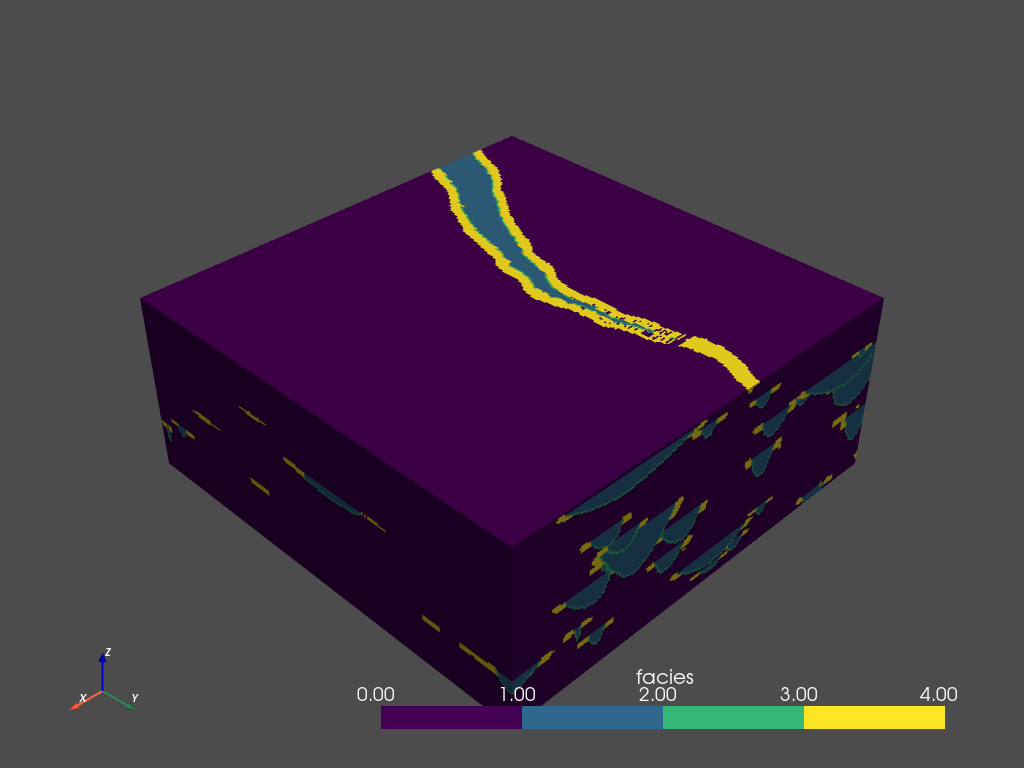

[(534.8076211353316, 534.8076211353316, 459.80762113533166),
 (125.0, 125.0, 50.0),
 (0.0, 0.0, 1.0)]

In [4]:
import matplotlib.pyplot as plt
import numpy as np
mesh = examples.load_channels()
# define a categorical colormap

cmap = plt.cm.get_cmap("viridis", 4)


mesh.plot(cmap=cmap)

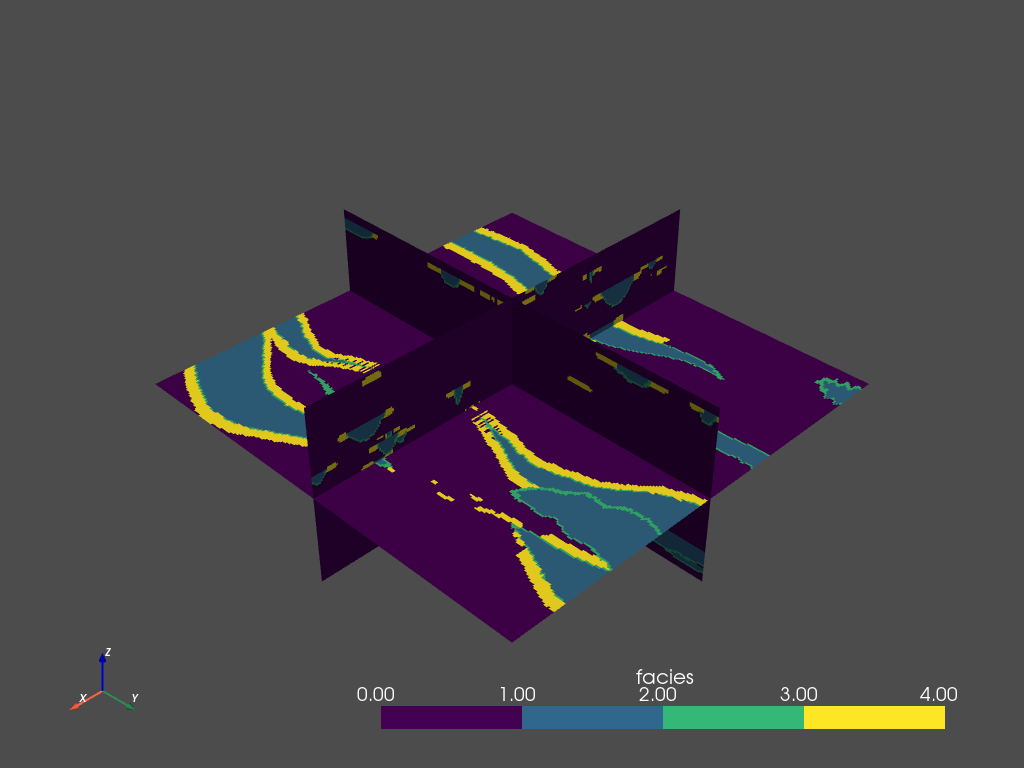

[(534.8076211353316, 534.8076211353316, 459.80762113533166),
 (125.0, 125.0, 50.0),
 (0.0, 0.0, 1.0)]

In [5]:
slices = mesh.slice_orthogonal()

slices.plot(cmap=cmap)

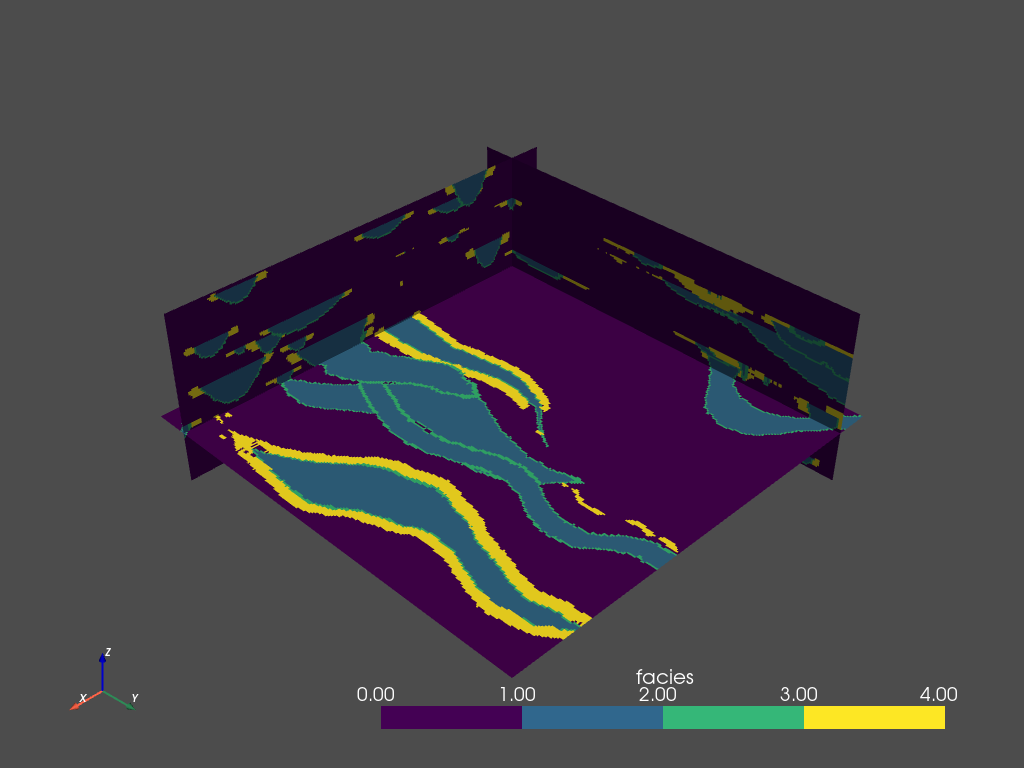

[(534.8076211353316, 534.8076211353316, 459.80762113533166),
 (125.0, 125.0, 50.0),
 (0.0, 0.0, 1.0)]

In [6]:
slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap)

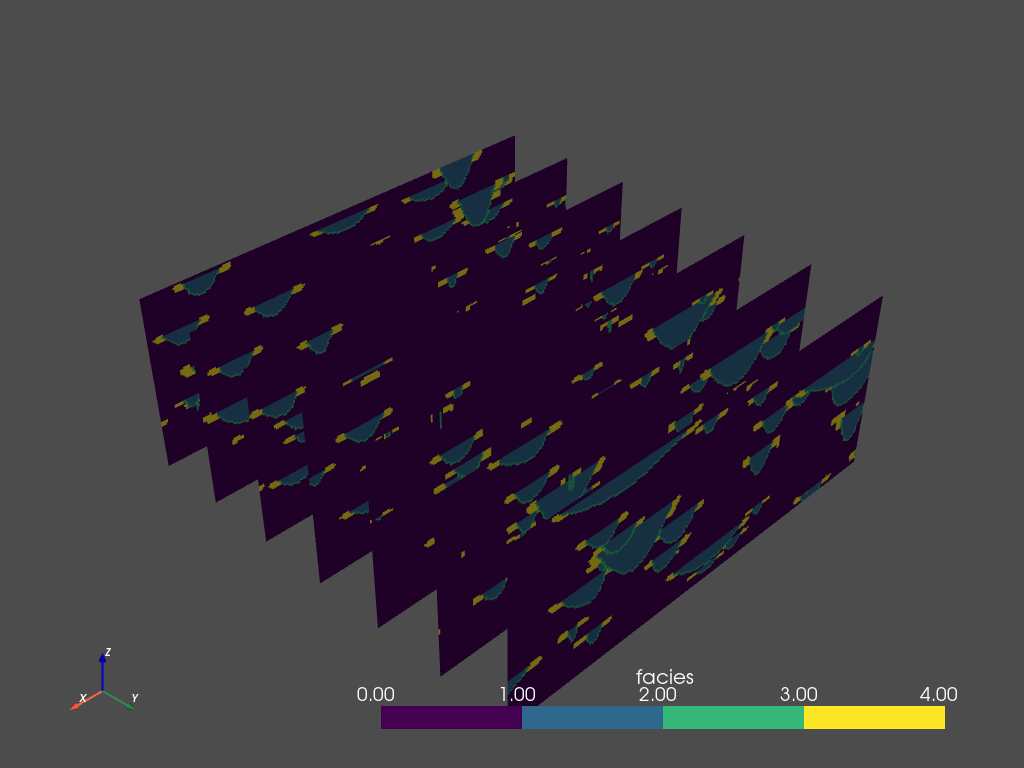

[(531.0336740029763, 531.0336740029763, 456.0336740029763),
 (125.0, 125.0, 50.0),
 (0.0, 0.0, 1.0)]

In [7]:
slices = mesh.slice_along_axis(n=7, axis="y")

slices.plot(cmap=cmap)

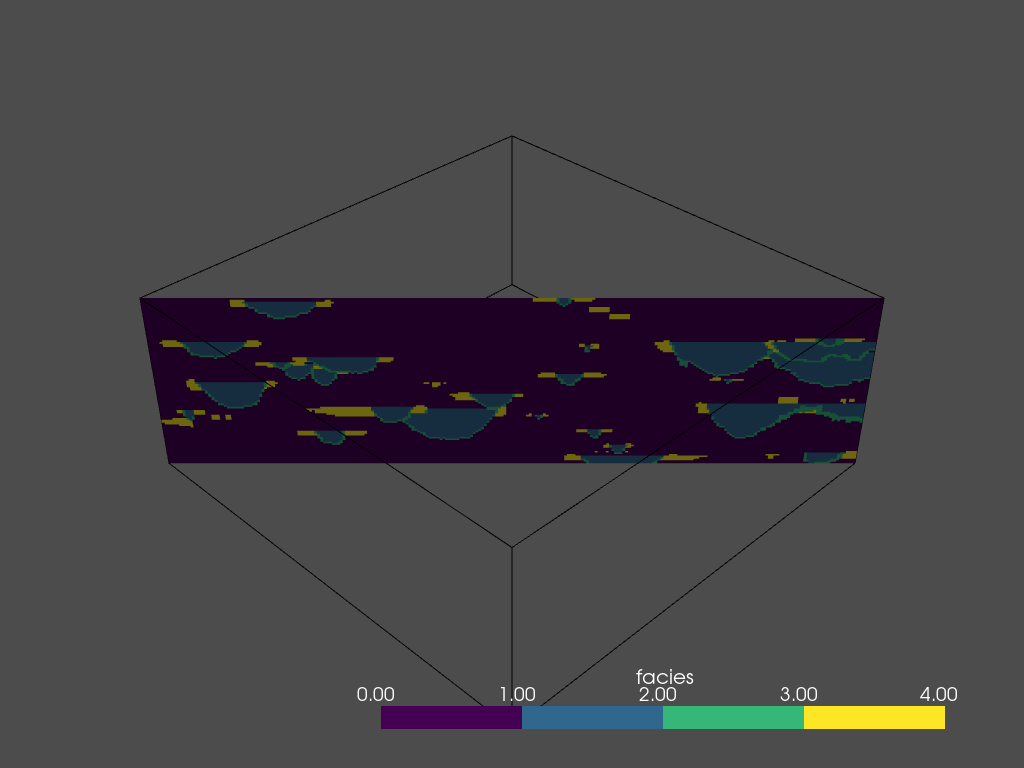

[(534.8076211353316, 534.8076211353316, 459.80762113533166),
 (125.0, 125.0, 50.0),
 (0.0, 0.0, 1.0)]

In [8]:
# Single slice - origin defaults to the center of the mesh
single_slice = mesh.slice(normal=[1, 1, 0])

p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(single_slice, cmap=cmap)
p.show()

In [9]:
mesh = examples.load_random_hills()

contours = mesh.contour()

p = pv.Plotter()
p.add_mesh(mesh, opacity=0.85)
p.add_mesh(contours, color="white", line_width=5)
p.show(use_ipyvtk=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[(32.59238063266725, 42.5923804083449, 36.404716943411536),
 (0.0, 9.99999977567765, 3.8123363107442856),
 (0.0, 0.0, 1.0)]

In [10]:
import numpy as np

vol = examples.download_brain()
vol

UniformGrid (0x2c5515e8f48)
  N Cells:	6998400
  N Points:	7109137
  X Bounds:	0.000e+00, 1.800e+02
  Y Bounds:	0.000e+00, 2.160e+02
  Z Bounds:	0.000e+00, 1.800e+02
  Dimensions:	181, 217, 181
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	1

In [11]:
values = np.linspace(5, 150, num=25)

In [12]:
surface = vol.contour([values[0]],)

In [13]:
surfaces = [vol.contour([v]) for v in values]


In [14]:
pv.rcParams['use_ipyvtk'] = True

p= pv.Plotter()


# Add initial mesh

surface = surfaces[2].copy()
p.add_mesh(surface, opacity=1, clim=vol.get_data_range())

# Add outline for reference
p.add_mesh(vol.outline_corners())

p.show(use_ipyvtk=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[(462.3615871740787, 480.3615871740787, 462.3615871740787),
 (90.0, 108.0, 90.0),
 (0.0, 0.0, 1.0)]